# 	What properties are associated with movies that have high economic performance?

## Table of contents

<li><a href="#Introduction">Introduction</a></li>
<li><a href="#Preparation">Preparation</a></li>
<li><a href="#Data cleaning">Data cleaning</a></li>
<li><a href="#Analysis">Analysis</a></li>
<li><a href="#Conclusions">Conclusions</a></li>

## Introduction
<a id='Introduction'></a>

The objective of this document is to give producers guidance on how to increase the economic performance of their movies.

The research question is: what properties are associated with movies that have high economic performance?

The operational definition of economic performance is Gross Profit Margin (GPM):


\begin{equation}
GPM = \frac{revenue - budget}{revenue}
\end{equation}

Revenue and budget are inflation adjusted to be comparable for movies from different release dates.

The methodology to answer the research question is data analysis. The properties

* budget,
* revenue,
* rating,
* release month, and
* release day (of the month)

are investigated and their correlation with each other and on the GPM is determined.

Additionally the impact of previously released movies on a given movie is also analyzed.

## Preparation
<a id='Preparation'></a>

In this section preporatory steps are taken, namely:
* Importing required Python packages.
* Modifying settings which are applicable for this entire notebook.
* Loading in the data.
* High level modification of data, e.g. converting string to datetime.

In [1]:
# Importing required packages and modifying settings.
import itertools
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# Importing data.
data = pd.read_csv('tmdb-movies.csv')
data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# Changing entries in USD to MUSD (million USD) for better readability.
data['budget'] /= 10**6
data['revenue'] /= 10**6
data['budget_adj'] /= 10**6
data['revenue_adj'] /= 10**6
data[['original_title', 'budget', 'revenue', 'budget_adj', 'revenue_adj']].head(3)

,original_title,budget,revenue,budget_adj,revenue_adj
0,Jurassic World,150.0,1513.528810,137.999939,1392.445893
1,Mad Max: Fury Road,150.0,378.436354,137.999939,348.161292
2,Insurgent,110.0,295.238201,101.199955,271.619025


In [4]:
# Changing 'release_date' entries from string format to datetime.
data['release_date'] = pd.to_datetime(data['release_date'], format='%m/%d/%y')
data[['original_title', 'release_date']].head(3)

,original_title,release_date
0,Jurassic World,2015-06-09
1,Mad Max: Fury Road,2015-05-13
2,Insurgent,2015-03-18


## Data cleaning
<a id='Data cleaning'></a>

In this section the data is inspected more closely, modified and cleaned as necessary.

### Year

In [5]:
# Obtaining the key properties of the distribution of 'release_year'.
data['release_year'].describe()

count    10866.000000
mean      2001.322658
std         12.812941
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

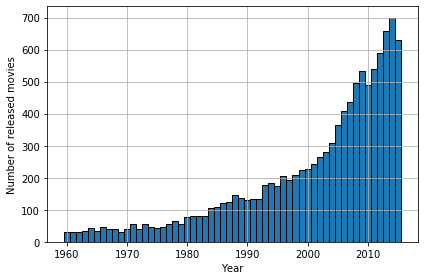

In [6]:
# Plotting the histogram of 'release_year'.
data['release_year'].hist(ec='black', bins=np.linspace(1959.5, 2015.5, num=(2015-1960+2)))
plt.xlabel('Year')
plt.ylabel('Number of released movies')
plt.tight_layout()

'release_year' seems correct and does not require any actions.

### Release date

In [7]:
# Obtaining the key properties of the distribution of 'release_date'.
data['release_date'].describe()

count                   10866
unique                   5909
top       2009-01-01 00:00:00
freq                       28
first     1969-01-01 00:00:00
last      2068-12-22 00:00:00
Name: release_date, dtype: object

The maximum 'release_date' is in the future. This cannot be correct. Upon further inspection it is found that the string format entry in the original data is simply 68, which is incorrectly parsed as 2068 whereas it should be 1968. However the 'release_year' entry is correct. Hence 'release_year' can be used to check and correct 'release_date'.

In [8]:
# Defining a function to check and correct 'release_date'.
def correct_year(series):
    if series['release_date'].year != series['release_year']:
        series['release_date'] = series['release_date'].replace(year=int(series['release_year']))
    return series

In [9]:
# Applying the above function to the data.
data = data.apply(correct_year,axis=1)

In [10]:
# Obtaining the key properties of the distribution of the now corrected 'release_date'.
data['release_date'].describe()

count                   10866
unique                   5909
top       2009-01-01 00:00:00
freq                       28
first     1960-01-01 00:00:00
last      2015-12-31 00:00:00
Name: release_date, dtype: object

'release_date' seems now correct and does not require further actions.

### Rating

Rating refers to 'vote_average'.

In [11]:
# Obtaining the key properties of the distribution of 'vote_average'.
data['vote_average'].describe()

count    10866.000000
mean         5.974922
std          0.935142
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

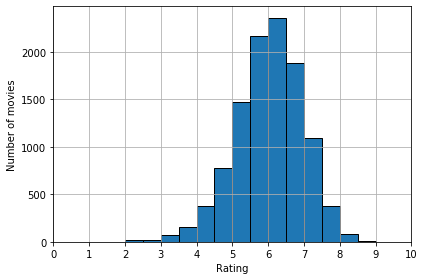

In [12]:
# Plotting the histogram of 'vote_average'.
ax = data['vote_average'].hist(ec='black',bins=np.linspace(0, 10, num=21))
plt.xlabel('Rating')
plt.ylabel('Number of movies')
ax.set_xlim(0, 10)
ax.xaxis.set_major_locator(mpl.ticker.LinearLocator(11))
plt.tight_layout()

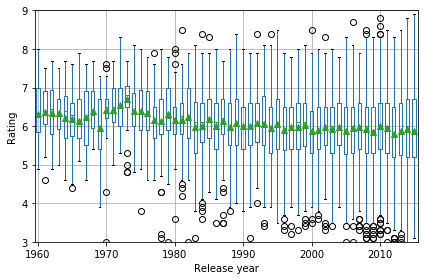

In [13]:
# Creating a boxplot of 'vote_average', grouped by 'release_year'.
ax = data.boxplot(by='release_year', column=['vote_average'], showmeans=True)
ax.set_xlabel('Release year')
ax.set_ylabel('Rating')
plt.title('')
plt.suptitle('')
ax.set_ylim(3, 9)
tick_skip = 10
ax.set_xticklabels(ax.get_xticklabels()[::tick_skip])
ax.set_xticks(ax.get_xticks()[::tick_skip])
plt.tight_layout()

'vote_average' seems correct and does not require any actions.

### Adjusted budget

In [14]:
# Obtaining the key properties of the distribution of 'budget_adj'.
data['budget_adj'].describe()

count    10866.000000
mean        17.551040
std         34.306156
min          0.000000
25%          0.000000
50%          0.000000
75%         20.853251
max        425.000000
Name: budget_adj, dtype: float64

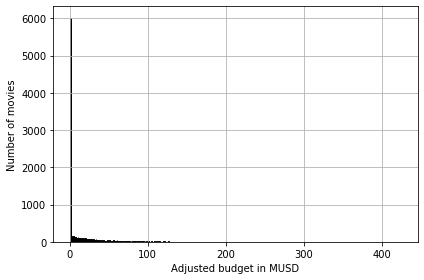

In [15]:
# Plotting the histogram of 'budget_adj'.
data['budget_adj'].hist(ec='black', bins=range(0,426,1))
plt.xlabel('Adjusted budget in MUSD')
plt.ylabel('Number of movies')
plt.tight_layout()

There seem to be a lot of movies with an adjusted budget of less than 1 MUSD. This requires further investigation. 

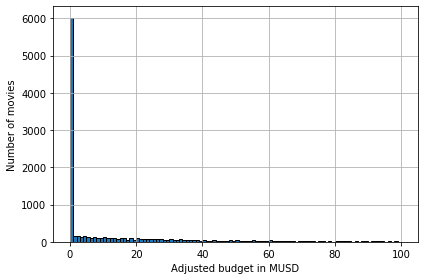

In [16]:
# Zooming in.
data['budget_adj'].hist(ec='black', bins=range(0,101,1))
plt.xlabel('Adjusted budget in MUSD')
plt.ylabel('Number of movies')
plt.tight_layout()

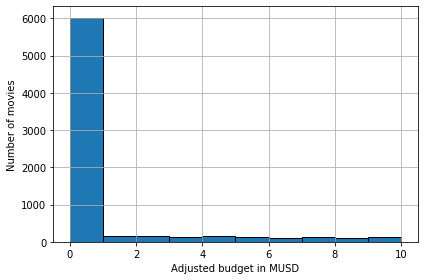

In [17]:
# Zooming further in.
data['budget_adj'].hist(ec='black', bins=range(0,11,1))
plt.xlabel('Adjusted budget in MUSD')
plt.ylabel('Number of movies')
plt.tight_layout()

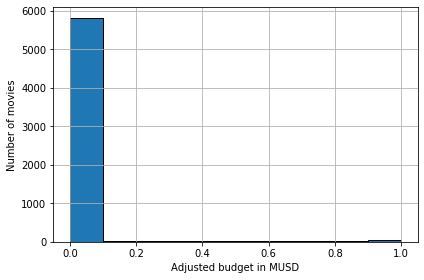

In [18]:
# Zooming further in.
data['budget_adj'].hist(ec='black', bins=np.linspace(0,1,num=11))
plt.xlabel('Adjusted budget in MUSD')
plt.ylabel('Number of movies')
plt.tight_layout()

There seem to be a lot of movies with an adjusted budget of less than 0.1 MUSD. This seems incorrect.

In [19]:
# Checking how many movies have an adjusted budget of exactly 0 MUSD.
(data['budget_adj'] == 0).sum()

5696

In [20]:
# Checking how many movies have an adjusted budget of more than 0 MUSD.
(data['budget_adj'] > 0).sum()

5170

In [21]:
# Verifying that all movies have numerical and postive entries for 'budget_adj'.
len(data['budget_adj']) == (data['budget_adj'] == 0).sum() + (data['budget_adj'] > 0).sum()

True

In [22]:
# Looking at an entry with adjusted budget of 0.
data.iloc[data['budget_adj'].argsort()[0]]

id                                                                   9611
imdb_id                                                         tt0120032
popularity                                                       0.431088
budget                                                                  0
revenue                                                           29.2354
original_title                     Romy and Michele's High School Reunion
cast                    Mira Sorvino|Lisa Kudrow|Janeane Garofalo|Alan...
homepage                                                              NaN
director                                                     David Mirkin
tagline                                    The Blonde Leading The Blonde.
keywords                smoking|overweight child|graduation|marriage|h...
overview                Two not-too-bright party girls reinvent themse...
runtime                                                                92
genres                                

According to Wikipedia, this movie had a non-zero budget. Apparently the entry is incorrect. It is assumed that all zero-entries for adjusted budget are incorrect. It is decided to exclude all movies whith zero-entries for adjusted budget.

In [23]:
# Deleting movies whith zero-entries for adjusted budget.
data = data[data['budget_adj'] > 0]
data.reset_index(drop=True, inplace=True)

In [24]:
# Obtaining the key properties of the distribution of 'budget_adj' after the deletion of zero-entries.
(data['budget_adj']).describe().apply(lambda x: format(x, 'f'))

count    5170.000000
mean       36.887737
std        41.957008
min         0.000001
25%         8.102293
50%        22.722709
75%        50.074831
max       425.000000
Name: budget_adj, dtype: object

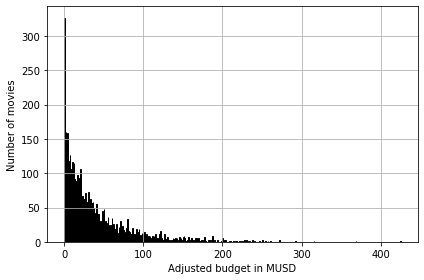

In [25]:
# Plotting the histogram of 'budget_adj' after the deletion of zero-entries.
data['budget_adj'].hist(ec='black', bins=range(0, 426, 1))
plt.xlabel('Adjusted budget in MUSD')
plt.ylabel('Number of movies')
plt.tight_layout()

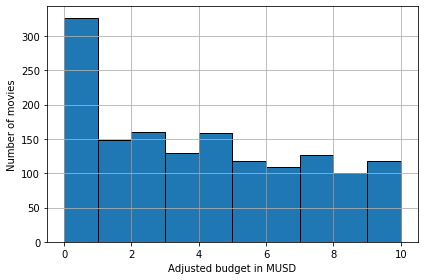

In [26]:
# Zooming in.
data['budget_adj'].hist(ec='black', bins=range(0, 11, 1))
plt.xlabel('Adjusted budget in MUSD')
plt.ylabel('Number of movies')
plt.tight_layout()

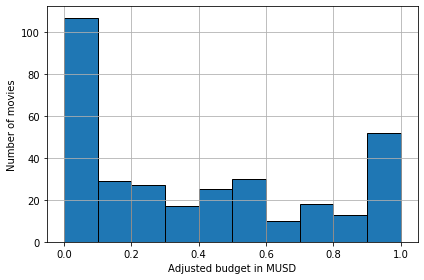

In [27]:
# Zooming further in.
data['budget_adj'].hist(ec='black', bins=np.linspace(0,1,num=11))
plt.xlabel('Adjusted budget in MUSD')
plt.ylabel('Number of movies')
plt.tight_layout()

In [28]:
# Checking how many movies have an adjusted budget smaller than 1 MUSD.
(data['budget_adj'] < 1).sum()

327

In [29]:
# Looking at the movie with the currently lowest entry of 'budget_adj'.
data.iloc[data['budget_adj'].argmin()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


id                                                                 287524
imdb_id                                                         tt2165765
popularity                                                       0.177102
budget                                                              1e-06
revenue                                                                 0
original_title                                                Fear Clinic
cast                    Thomas Dekker|Robert Englund|Cleopatra Coleman...
homepage                                  http://www.fearclinicmovie.com/
director                                                      Robert Hall
tagline                                                               NaN
keywords                                               phobia|doctor|fear
overview                A doctor works to cure patients suffering from...
runtime                                                                95
genres                                

According to Wikipedia, this movie had a higher budget. Apparently the entry is incorrect. It is assumed that all entries for adjusted budget which are less than 1 MUSD are incorrect. It is decided to remove all movies with an adjusted budget of less than 1 MUSD.

In [30]:
# Deleting movies whith entries for adjusted budget which are less than 1 MUSD.
data = data[data['budget_adj'] >= 1]
data.reset_index(drop=True, inplace=True)

In [31]:
# Obtaining the key properties of the distribution of 'budget_adj' after the deletion of entries which are less than 1 MUSD.
(data['budget_adj']).describe().apply(lambda x: format(x, 'f'))

count    4843.000000
mean       39.352501
std        42.227950
min         1.000000
25%        10.164004
50%        25.319666
75%        52.828236
max       425.000000
Name: budget_adj, dtype: object

In [32]:
# Looking at the movie with the currently lowest entry of 'budget_adj'.
data.iloc[data['budget_adj'].argsort()[0]]

id                                                                  46705
imdb_id                                                         tt1120985
popularity                                                        1.27137
budget                                                                  1
revenue                                                           12.3557
original_title                                             Blue Valentine
cast                    Ryan Gosling|Michelle Williams|Mike Vogel|John...
homepage                               http://www.bluevalentinemovie.com/
director                                                 Derek Cianfrance
tagline                                        Nobody Baby But You And Me
keywords                        dancing|nurse|depression|classroom|bridge
overview                Dean and Cindy live a quiet life in a modest n...
runtime                                                               112
genres                                

This entry is correct.

In [33]:
# Looking at the movie with the currently second lowest entry of 'budget_adj'.
data.iloc[data['budget_adj'].argsort()[1]]

id                                                                    948
imdb_id                                                         tt0077651
popularity                                                        1.19885
budget                                                                0.3
revenue                                                                70
original_title                                                  Halloween
cast                    Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...
homepage                http://www.theofficialjohncarpenter.com/hallow...
director                                                   John Carpenter
tagline                                           The Night HE Came Home!
keywords                   female nudity|nudity|mask|babysitter|halloween
overview                A psychotic murderer, institutionalized since ...
runtime                                                                91
genres                                

This entry is also correct.

In [34]:
# Looking at the movie with the currently third lowest entry of 'budget_adj'.
data.iloc[data['budget_adj'].argsort()[2]]

id                                                                   9813
imdb_id                                                         tt0414951
popularity                                                       0.443094
budget                                                                0.9
revenue                                                           0.38142
original_title                                                  The Quiet
cast                    Elisha Cuthbert|Camilla Belle|Edie Falco|Marti...
homepage                                                              NaN
director                                                     Jamie Babbit
tagline                        Isn't it time everyone hears your secrets?
keywords                depression|christmas party|deaf-mute|daughter|...
overview                After her widowed father dies, deaf teenager D...
runtime                                                                96
genres                                

This entry is also correct. It is assumed that the entries of 'budget_adj' are correct at the lower end because the three lowest entries have been checked at are all correct.

In [35]:
# Looking at the movie with the highest entry of 'budget_adj'.
data.iloc[(-data['budget_adj']).argsort()[0]]

id                                                                  46528
imdb_id                                                         tt1032751
popularity                                                        0.25054
budget                                                                425
revenue                                                           11.0876
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage                           http://www.iamrogue.com/thewarriorsway
director                                                       Sngmoo Lee
tagline                                           Assassin. Hero. Legend.
keywords                assassin|small town|revenge|deception|super speed
overview                An Asian assassin (Dong-gun Jang) is forced to...
runtime                                                               100
genres                          Advent

According to Wikipedia, this movie had a smaller budget. Apparently the entry is incorrect.

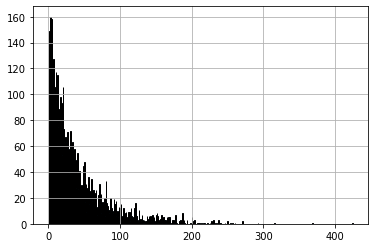

In [36]:
# Plotting the histogram of 'budget_adj'.
data['budget_adj'].hist(ec='black', bins=range(0,426,1))

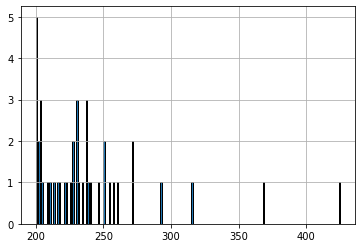

In [37]:
# Zooming in.
data['budget_adj'].hist(ec='black', bins=range(200,426,1))

The historgrams seem fine except for the aforementioned incorrect high entry.

In [38]:
# Looking at the movie with the second highest entry of 'budget_adj'.
data.iloc[(-data['budget_adj']).argsort()[1]]

id                                                                   1865
imdb_id                                                         tt1298650
popularity                                                        4.95513
budget                                                                380
revenue                                                           1021.68
original_title                Pirates of the Caribbean: On Stranger Tides
cast                    Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...
homepage                http://disney.go.com/pirates/index-on-stranger...
director                                                     Rob Marshall
tagline                                       Live Forever Or Die Trying.
keywords                          sea|captain|mutiny|sword|prime minister
overview                Captain Jack Sparrow crosses paths with a woma...
runtime                                                               136
genres                                

This entry is correct.

In [39]:
# Looking at the movie with the third highest entry of 'budget_adj'.
data.iloc[(-data['budget_adj']).argsort()[2]]

id                                                                    285
imdb_id                                                         tt0449088
popularity                                                        4.96539
budget                                                                300
revenue                                                               961
original_title                   Pirates of the Caribbean: At World's End
cast                    Johnny Depp|Orlando Bloom|Keira Knightley|Geof...
homepage                     http://disney.go.com/disneypictures/pirates/
director                                                   Gore Verbinski
tagline                    At the end of the world, the adventure begins.
keywords                ocean|drug abuse|exotic island|east india trad...
overview                Captain Barbossa, long believed to be dead, ha...
runtime                                                               169
genres                                

This entry is also correct.

In [40]:
# Looking at the movie with the fourth highest entry of 'budget_adj'.
data.iloc[(-data['budget_adj']).argsort()[3]]

id                                                                   1452
imdb_id                                                         tt0348150
popularity                                                        1.95733
budget                                                                270
revenue                                                           391.081
original_title                                           Superman Returns
cast                    Brandon Routh|Kevin Spacey|Kate Bosworth|James...
homepage                                          http://www.superman.com
director                                                     Bryan Singer
tagline                                                               NaN
keywords                saving the world|dc comics|invulnerability|seq...
overview                Set 5 years after the end of Superman II, the ...
runtime                                                               154
genres                           Adven

This entry is also correct. It is assumed that the entries of 'budget_adj' are correct at the upper end because the four highest entries have been checked at are all correct, except for the highest entry, which is incorrect. It is decided to remove this incorrect entry.

In [41]:
# Removing the known incorrect entry.
data.drop(data[data['original_title']=='The Warrior\'s Way'].index, inplace=True)
data.reset_index(drop=True, inplace=True)

In [42]:
# Obtaining the key properties of the distribution of 'budget_adj' after the data cleaning done so far.
(data['budget_adj']).describe().apply(lambda x: format(x, 'f'))

count    4842.000000
mean       39.272855
std        41.866932
min         1.000000
25%        10.164004
50%        25.296283
75%        52.828236
max       368.371256
Name: budget_adj, dtype: object

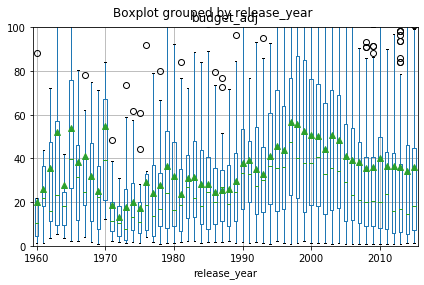

In [43]:
# Creating a boxplot of 'budget_adj', grouped by 'release_year'.
ax = data.boxplot(by='release_year', column=['budget_adj'],  showmeans=True)
ax.set_ylim(0, 100)
tick_skip = 10
ax.set_xticklabels(ax.get_xticklabels()[::tick_skip])
ax.set_xticks(ax.get_xticks()[::tick_skip])
plt.tight_layout()

There seems to be a lot of deviation from year to year in the 1960ies.

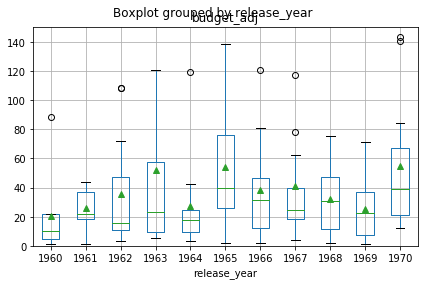

In [44]:
# Zooming in on the 1960ies.
ax = data[(data['release_year']>= 1960) & (data['release_year']<= 1970)].boxplot(by='release_year', column=['budget_adj'],showmeans=True)
ax.set_ylim(0, 150)
# tick_skip = 10
# ax.set_xticklabels(ax.get_xticklabels()[::tick_skip])
# ax.set_xticks(ax.get_xticks()[::tick_skip])
plt.tight_layout()

In [45]:
# Looking at adjusted budget of movies in 1963.
data[data['release_year']==1963][['original_title','budget_adj']]

,original_title,budget_adj
4690,From Russia With Love,17.800448
4691,The Birds,17.800448
4692,Charade,28.480717
4693,Cleopatra,221.544381
4694,"It's a Mad, Mad, Mad, Mad World",66.929686
4695,The Great Escape,28.480717
4696,The Day of the Triffids,5.340135
4697,Tom Jones,7.120179
4698,55 Days at Peking,121.043049
4699,Jason and the Argonauts,7.120179


In [46]:
# Looking at adjusted budget of movies in 1965.
data[data['release_year']==1965][['original_title','budget_adj']]

,original_title,budget_adj
4788,Thunderball,76.126201
4789,The Sound of Music,56.748622
4790,Doctor Zhivago,96.887892
4791,Those Magnificent Men in Their Flying Machines...,38.755157
4792,Help!,10.380846
4793,Von Ryan's Express,39.862447
4794,Repulsion,2.076169
4795,The Greatest Story Ever Told,138.411274
4796,Major Dundee,26.298142


The 1960ies in general, and 1963 and 1965 in particular, were times with large deviations in movie budgets, see als https://en.wikipedia.org/wiki/1960s_in_film, https://en.wikipedia.org/wiki/1963_in_film and https://en.wikipedia.org/wiki/1965_in_film.

'budget_adj' seems now correct and it does not require further actions.

### Adjusted revenue

In [47]:
# Obtaining the key properties of the distribution of 'revenue_adj'.
(data['revenue_adj']).describe().apply(lambda x: format(x, 'f'))

count    4842.000000
mean      108.702536
std       200.638325
min         0.000000
25%         0.300805
50%        34.252679
75%       123.515939
max      2827.123750
Name: revenue_adj, dtype: object

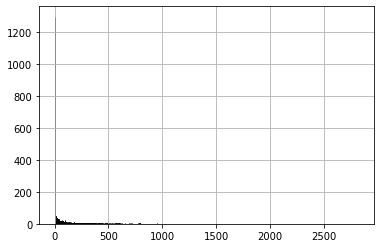

In [48]:
# Plotting the histogram of 'revenue_adj'.
data['revenue_adj'].hist(ec='black', bins=range(0,2828,1))

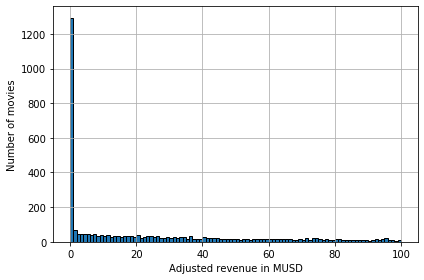

In [49]:
# Zooming in.
data['revenue_adj'].hist(ec='black', bins=range(0,101,1))
plt.xlabel('Adjusted revenue in MUSD')
plt.ylabel('Number of movies')
plt.tight_layout()

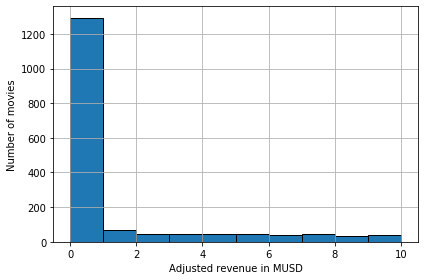

In [50]:
# Zooming further in.
data['revenue_adj'].hist(ec='black', bins=range(0,11,1))
plt.xlabel('Adjusted revenue in MUSD')
plt.ylabel('Number of movies')
plt.tight_layout()

There seem to be a lot of movies with a an adjusted revenue of less than 1 MUSD. This requires further investigation. 

In [51]:
# Checking how many movies have an adjusted revenue of exactly 0 MUSD.
(data['revenue_adj'] == 0).sum()

1108

In [52]:
# Checking how many movies have an adjusted revenue of more than 0 MUSD.
(data['revenue_adj'] > 0).sum()

3734

In [53]:
# Verifying that all movies have numerical and postive entries for 'revenue_adj'.
len(data['revenue_adj']) == (data['revenue_adj'] == 0).sum() + (data['revenue_adj'] > 0).sum()

True

In [54]:
# Looking at an entry with adjusted revenue of 0.
data.iloc[(data['revenue_adj']).argsort()[0]]

id                                                                  13343
imdb_id                                                         tt0059221
popularity                                                       0.141026
budget                                                                0.7
revenue                                                                 0
original_title                                    The Ghost & Mr. Chicken
cast                    Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...
homepage                                                              NaN
director                                                      Alan Rafkin
tagline                 G-G-GUARANTEED! YOU'LL BE SCARED UNTIL YOU LAU...
keywords                    newspaper|haunted house|organ|slapstick|trial
overview                Luther Heggs aspires to being a reporter for h...
runtime                                                                90
genres                                

According to Wikipedia, this movie had a non-zero revenue. Apparently the entry is incorrect. It is assumed that all zero-entries for adjusted revenue are incorrect. It is decided to exclude all movies whith zero-entries for adjusted revenue.

In [55]:
# Deleting movies whith zero-entries for adjusted revenue.
data = data[data['revenue_adj'] > 0]
data.reset_index(drop=True, inplace=True)
len(data)

3734

In [56]:
# Obtaining the key properties of the distribution of 'revenue_adj' after the deletion of zero-entries.
(data['revenue_adj']).describe().apply(lambda x: format(x, 'f'))

count    3734.000000
mean      140.958136
std       218.303057
min         0.000002
25%        20.415780
50%        64.834782
75%       168.328478
max      2827.123750
Name: revenue_adj, dtype: object

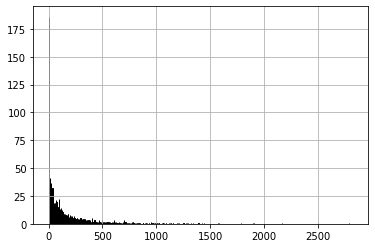

In [57]:
# Plotting the histogram of 'revenue_adj' after the deletion of zero-entries.
data['revenue_adj'].hist(ec='black', bins=range(0,2828,1))

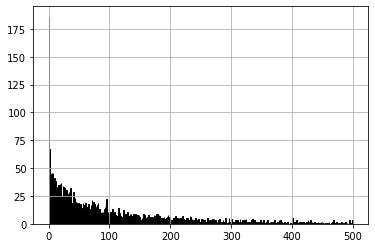

In [58]:
# Zooming in.
data['revenue_adj'].hist(ec='black', bins=range(0,501,1))

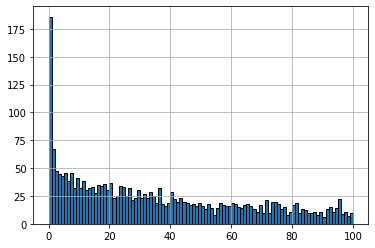

In [59]:
# Zooming further in.
data['revenue_adj'].hist(ec='black', bins=range(0,101,1))

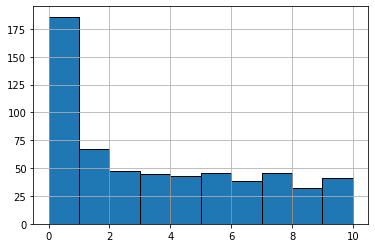

In [60]:
# Zooming further in.
data['revenue_adj'].hist(ec='black', bins=range(0,11,1))

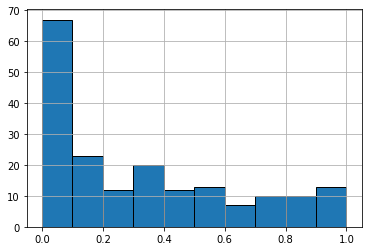

In [61]:
# Zooming further in.
data['revenue_adj'].hist(ec='black', bins=np.linspace(0,1,num=11))

In [62]:
# Checking how many movies have an adjusted revenue smaller than 1 MUSD.
(data['revenue_adj'] < 1).sum()

186

In [63]:
# Looking at the movie with the currently lowest entry of 'revenue_adj'.
data.iloc[(data['revenue_adj']).argsort()[0]]

id                                                                  13537
imdb_id                                                         tt0323944
popularity                                                       0.462609
budget                                                                  6
revenue                                                             2e-06
original_title                                            Shattered Glass
cast                    Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
homepage                                                              NaN
director                                                        Billy Ray
tagline                                                               NaN
keywords                                                              NaN
overview                Fact-based 2003 drama about the young journali...
runtime                                                                94
genres                                

According to Wikipedia, this movie had a higher budget. Apparently the entry is incorrect. It is assumed that all entries for adjusted revenue which are less than 1 MUSD are incorrect. It is decided to remove all movies with an adjusted revenue of less than 1 MUSD.

In [64]:
# Deleting movies whith entries for adjusted revenue which are less than 1 MUSD.
data = data[data['revenue_adj'] > 1]
data.reset_index(drop=True, inplace=True)

In [65]:
# Obtaining the key properties of the distribution of 'revenue_adj' after the deletion of entries which are less than 1 MUSD.
(data['revenue_adj']).describe().apply(lambda x: format(x, 'f'))

count    3547.000000
mean      148.372376
std       221.520718
min         1.001273
25%        25.183522
50%        71.282267
75%       176.623291
max      2827.123750
Name: revenue_adj, dtype: object

In [66]:
# Looking at the movie with the currently lowest entry of 'revenue_adj'.
data.iloc[(data['revenue_adj']).argsort()[0]]

id                                                                  12834
imdb_id                                                         tt1151359
popularity                                                       0.606857
budget                                                                  9
revenue                                                          0.985117
original_title                                            Leaves of Grass
cast                    Susan Sarandon|Richard Dreyfuss|Keri Russell|M...
homepage                               http://www.leavesofgrassmovie.com/
director                                                 Tim Blake Nelson
tagline                                Drugs, Murder, and Brotherly Love.
keywords                brother brother relationship|mentor|restart|ki...
overview                An Ivy League professor returns home, where hi...
runtime                                                               104
genres                                

This entry is correct.

In [67]:
# Looking at the movie with the currently second lowest entry of 'revenue_adj'.
data.iloc[(data['revenue_adj']).argsort()[1]]

id                                                                  27064
imdb_id                                                         tt0089603
popularity                                                       0.214009
budget                                                                  5
revenue                                                          0.502758
original_title                           Mishima: A Life in Four Chapters
cast                    Ken Ogata|GÃ´ RijÃ»|Masato Aizawa|Masayuki Shi...
homepage                                                              NaN
director                                                    Paul Schrader
tagline                                                               NaN
keywords                  suicide|japanese|nationalism|coup d'etat|author
overview                A fictional account of the life of Japanese au...
runtime                                                               121
genres                                

This entry is correct.

In [68]:
# Looking at the movie with the currently third lowest entry of 'revenue_adj'.
data.iloc[(data['revenue_adj']).argsort()[2]]

id                                                                  17680
imdb_id                                                         tt1103982
popularity                                                       0.272422
budget                                                                1.7
revenue                                                           1.00796
original_title                                  The Girlfriend Experience
cast                    Sasha Grey|Chris Santos|Peter Zizzo|Timothy J....
homepage                                                              NaN
director                                                Steven Soderbergh
tagline                                      See it with someone you ****
keywords                infidelity|economy|client|hooker|independent film
overview                Chelsea is an in-demand call girl whose $2,000...
runtime                                                                77
genres                                

This entry is also correct. It is assumed that the entries of 'revenue_adj' are correct at the lower end because the three lowest entries have been checked at are all correct.

In [69]:
# Looking at the movie with the highest entry of 'revenue_adj'.
data.iloc[(-data['revenue_adj']).argsort()[0]]

id                                                                  19995
imdb_id                                                         tt0499549
popularity                                                        9.43277
budget                                                                237
revenue                                                           2781.51
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
homepage                                      http://www.avatarmovie.com/
director                                                    James Cameron
tagline                                       Enter the World of Pandora.
keywords                culture clash|future|space war|space colony|so...
overview                In the 22nd century, a paraplegic Marine is di...
runtime                                                               162
genres                           Actio

This entry is correct.

In [70]:
# Looking at the movie with the second highest entry of 'revenue_adj'.
data.iloc[(-data['revenue_adj']).argsort()[1]]

id                                                                     11
imdb_id                                                         tt0076759
popularity                                                        12.0379
budget                                                                 11
revenue                                                           775.398
original_title                                                  Star Wars
cast                    Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
homepage                http://www.starwars.com/films/star-wars-episod...
director                                                     George Lucas
tagline                      A long time ago in a galaxy far, far away...
keywords                      android|galaxy|hermit|death star|lightsaber
overview                Princess Leia is captured and held hostage by ...
runtime                                                               121
genres                                

This entry is also correct.

In [71]:
# Looking at the movie with the third highest entry of 'revenue_adj'.
data.iloc[(-data['revenue_adj']).argsort()[2]]

id                                                                    597
imdb_id                                                         tt0120338
popularity                                                        4.35522
budget                                                                200
revenue                                                           1845.03
original_title                                                    Titanic
cast                    Kate Winslet|Leonardo DiCaprio|Frances Fisher|...
homepage                            http://www.titanicmovie.com/menu.html
director                                                    James Cameron
tagline                         Nothing on Earth could come between them.
keywords                             shipwreck|iceberg|ship|panic|titanic
overview                84 years later, a 101-year-old woman named Ros...
runtime                                                               194
genres                                

This entry is also correct. It is assumed that the entries of 'revenue_adj' are correct at the upper end because the three highest entries have been checked at are all correct.

In [72]:
# Obtaining the key properties of the distribution of 'revenue_adj' after the data cleaning done so far.
(data['revenue_adj']).describe().apply(lambda x: format(x, 'f'))

count    3547.000000
mean      148.372376
std       221.520718
min         1.001273
25%        25.183522
50%        71.282267
75%       176.623291
max      2827.123750
Name: revenue_adj, dtype: object

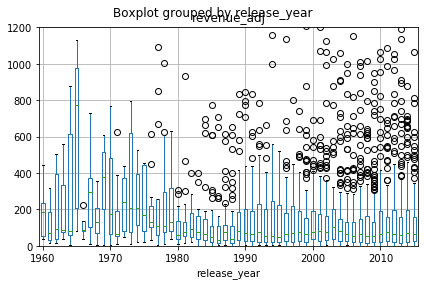

In [73]:
# Creating a boxplot of 'revenue_adj', grouped by 'release_year'.
ax = data.boxplot(by='release_year', column=['revenue_adj'])
ax.set_ylim(0, 1200)
tick_skip = 10
ax.set_xticklabels(ax.get_xticklabels()[::tick_skip])
ax.set_xticks(ax.get_xticks()[::tick_skip])
plt.tight_layout()

There seems to be a lot of deviation from year to year in the 1960ies.

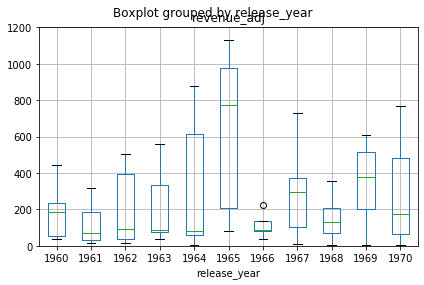

In [74]:
# Zooming in on the 1960ies.
ax = data[(data['release_year']>= 1960) & (data['release_year']<= 1970)].boxplot(by='release_year', column=['revenue_adj'])
ax.set_ylim(0, 1200)
# tick_skip = 10
# ax.set_xticklabels(ax.get_xticklabels()[::tick_skip])
# ax.set_xticks(ax.get_xticks()[::tick_skip])
plt.tight_layout()

In [75]:
# Looking at adjusted revenue of movies in 1965.
data[data['release_year']==1965][['original_title','revenue_adj']]

,original_title,revenue_adj
3517,Thunderball,977.153544
3518,The Sound of Music,1129.534862
3519,Doctor Zhivago,773.178594
3520,Those Magnificent Men in Their Flying Machines...,207.270883
3521,The Greatest Story Ever Told,83.046764


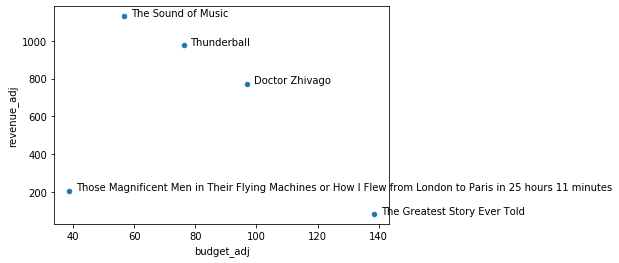

In [76]:
# Plotting adjusted revenue against adjusted budget of movies from 1965.
ax = data[data['release_year']==1965].plot.scatter(x='budget_adj', y='revenue_adj')
for row in data[data['release_year']==1965][['original_title', 'budget_adj', 'revenue_adj']].values:
    ax.annotate(row[0], xy =(row[1], row[2]), xytext =(7, 0), textcoords='offset pixels')

The 1960ies in general, and 1965 in particular, were times with large deviations in movie revenues (as well as budgets), see also https://en.wikipedia.org/wiki/1960s_in_film and https://en.wikipedia.org/wiki/1965_in_film.

'revenue_adj' seems now correct and it does not require further actions.

### Gross profit margin

In [77]:
# Creating the column GPM.
data['GPM'] = ( data['revenue_adj'] - data['budget_adj'] ) / data['revenue_adj']
data['GPM'].head(3)

0    0.900894
1    0.603632
2    0.627419
Name: GPM, dtype: float64

In [78]:
# Obtaining the key properties of the distribution of 'GPM'.
data['GPM'].describe()

count    3547.000000
mean       -0.013205
std         2.194826
min       -57.487476
25%         0.025748
50%         0.550247
75%         0.763172
max         0.996000
Name: GPM, dtype: float64

It is interesting to note that the mean is negative whereas the median is positive. The majority of the movies do make a profit, in fact above 50% GPM. However, the mean is negative due some "box-office bombs" generating negative profit as much as -575%.

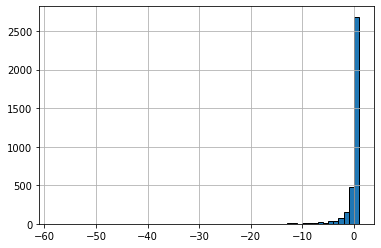

In [79]:
# Plotting the histogram of 'GPM'.
data['GPM'].hist(ec='black', bins=np.linspace(-58,1,num=60))

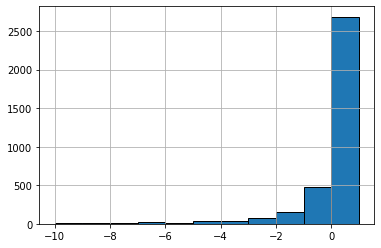

In [80]:
# Zooming in.
data['GPM'].hist(ec='black', bins=np.linspace(-10,1,num=12))

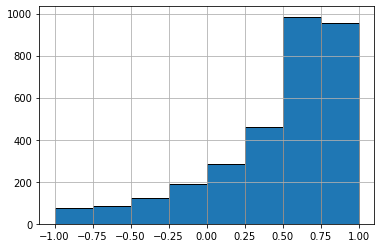

In [81]:
# Zooming further in.
data['GPM'].hist(ec='black', bins=np.linspace(-1,1,num=9))

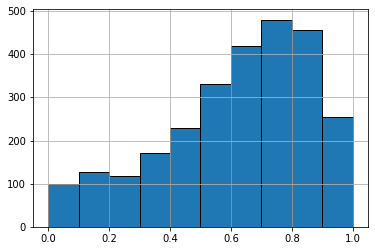

In [82]:
# Zooming further in.
data['GPM'].hist(ec='black', bins=np.linspace(0,1,num=11))

In [83]:
# Looking at the movie with the lowest entry of 'GPM'.
data.iloc[(data['GPM']).argsort()[0]]

id                                                                   9769
imdb_id                                                         tt0119558
popularity                                                        1.03133
budget                                                                 62
revenue                                                           1.06006
original_title                                                     Lolita
cast                    Jeremy Irons|Dominique Swain|Melanie Griffith|...
homepage                                                              NaN
director                                                      Adrian Lyne
tagline                 A forbidden love. An unthinkable attraction. T...
keywords                       jealousy|secret|blackmail|professor|lolita
overview                Urbane professor Humbert Humbert marries a New...
runtime                                                               137
genres                                

This entry is correct. 

In [84]:
# Looking at the movie with the second lowest entry of 'GPM'.
data.iloc[(data['GPM']).argsort()[1]]

id                                                                  50512
imdb_id                                                         tt0118623
popularity                                                         0.2817
budget                                                                 35
revenue                                                           0.79183
original_title                                              Anna Karenina
cast                    Sophie Marceau|Sean Bean|Alfred Molina|Mia Kir...
homepage                                                              NaN
director                                                     Bernard Rose
tagline                 In a world of power and privilege, one woman d...
keywords                                                              NaN
overview                Anna (Marceau) is a wife and mother who has an...
runtime                                                               108
genres                                

This entry is also correct. 

In [85]:
# Looking at the movie with the third lowest entry of 'GPM'.
data.iloc[(data['GPM']).argsort()[2]]

id                                                                  22256
imdb_id                                                         tt0119934
popularity                                                       0.245817
budget                                                                 25
revenue                                                          0.777423
original_title                                             Without Limits
cast                    Billy Crudup|Donald Sutherland|Monica Potter|J...
homepage                                                              NaN
director                                                     Robert Towne
tagline                 PRE. The way he competed. The way he lived his...
keywords                              running|olympic games|sport|athlete
overview                The film follows the life of famous 1970s runn...
runtime                                                               117
genres                                

This entry is also correct. It is assumed that the entries of 'GPM' are correct at the lower end because the three lowest entries have been checked at are all correct.

In [86]:
# Looking at the movie with the highest entry of 'GPM'.

In [87]:
data.iloc[(-data['GPM']).argsort()[0]]

id                                                                   9659
imdb_id                                                         tt0079501
popularity                                                        2.01202
budget                                                                0.4
revenue                                                               100
original_title                                                    Mad Max
cast                    Mel Gibson|Joanne Samuel|Hugh Keays-Byrne|Stev...
homepage                                                              NaN
director                                                    George Miller
tagline                                   The Maximum Force Of The Future
keywords                      chain|baby|bridge|post-apocalyptic|dystopia
overview                In a dystopic future Australia, a vicious bike...
runtime                                                                93
genres                          Advent

This entry is correct. On a side note, this movie holds the Guinness record for most profitable film.

In [88]:
# Looking at the movie with the second highest entry of 'GPM'.

In [89]:
data.iloc[(-data['GPM']).argsort()[1]]

id                                                                    948
imdb_id                                                         tt0077651
popularity                                                        1.19885
budget                                                                0.3
revenue                                                                70
original_title                                                  Halloween
cast                    Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...
homepage                http://www.theofficialjohncarpenter.com/hallow...
director                                                   John Carpenter
tagline                                           The Night HE Came Home!
keywords                   female nudity|nudity|mask|babysitter|halloween
overview                A psychotic murderer, institutionalized since ...
runtime                                                                91
genres                                

This entry is also correct.

In [90]:
# Looking at the movie with the third highest entry of 'GPM'.

In [91]:
data.iloc[(-data['GPM']).argsort()[2]]

id                                                                    838
imdb_id                                                         tt0069704
popularity                                                       0.684079
budget                                                              0.777
revenue                                                               115
original_title                                          American Graffiti
cast                    Richard Dreyfuss|Ron Howard|Paul Le Mat|Charle...
homepage                                                              NaN
director                                                     George Lucas
tagline                                            Where were you in '62?
keywords                farewell|rock and roll|robbery|love at first s...
overview                A couple of high school graduates spend one fi...
runtime                                                               110
genres                                

This entry is also correct. It is assumed that the entries of 'GPM' are correct at the upper end because the three highest entries have been checked at are all correct.

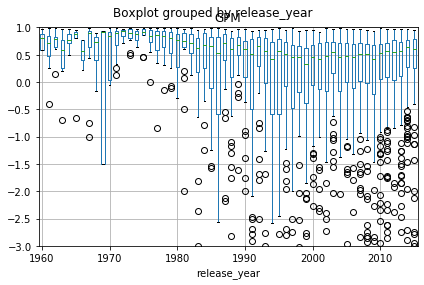

In [92]:
# Creating a boxplot of 'GPM', grouped by 'release_year'.
ax = data.boxplot(by='release_year', column=['GPM'])
ax.set_ylim(-3,1)
tick_skip = 10
ax.set_xticklabels(ax.get_xticklabels()[::tick_skip])
ax.set_xticks(ax.get_xticks()[::tick_skip])
plt.tight_layout()

## Analysis
<a id='Analysis'></a>

In this section the data is analyzed to answer the research question(s).

Note that all references to 'budget' and 'revenue' in this section refer to their adjusted versions 'budget_adj' and 'revenue_adj'. Furthermore, 'rating' refers to 'vote_average'.

### Is high budget associated with high rating?

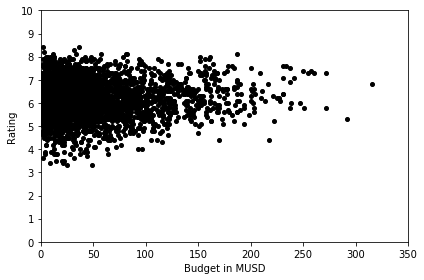

In [93]:
# Creating a boxplot of rating vs. budget.
fig, ax1 = plt.subplots()
ax1.plot(data['budget_adj'], data['vote_average'], 'o', color='black', markersize=4)
ax1.set_xlabel('Budget in MUSD')
ax1.set_ylabel('Rating')
ax1.set_xlim(0, 350)
ax1.set_ylim(0, 10)
ax1.yaxis.set_major_locator(mpl.ticker.LinearLocator(11))
plt.tight_layout()

In [94]:
data[['budget_adj', 'vote_average']].corr()

,budget_adj,vote_average
budget_adj,1.000000,0.020901
vote_average,0.020901,1.000000


High budget is not associated with high ratings.

### Is high rating associated with high revenue?

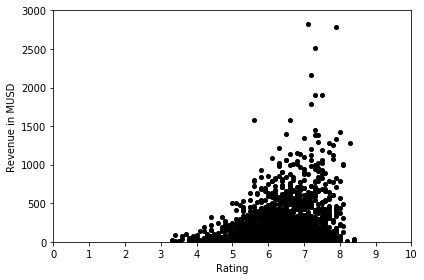

In [95]:
# Creating a boxplot of revenue vs. rating.
fig, ax1 = plt.subplots()
ax1.plot(data['vote_average'], data['revenue_adj'], 'o', color='black', markersize=4)
ax1.set_xlabel('Rating')
ax1.set_ylabel('Revenue in MUSD')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 3000)
ax1.xaxis.set_major_locator(mpl.ticker.LinearLocator(11))
plt.tight_layout()

In [96]:
data[['vote_average', 'revenue_adj']].corr()

,vote_average,revenue_adj
vote_average,1.000000,0.269597
revenue_adj,0.269597,1.000000


Yes, high ratings are associated with high revenues.

### Is high budget associated with high revenue?

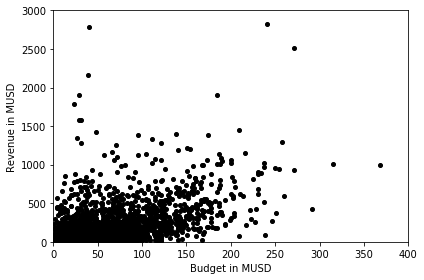

In [97]:
# Creating a boxplot of budget. vs. revenue.
fig, ax1 = plt.subplots()
ax1.plot(data['budget_adj'], data['revenue_adj'], 'o', color='black', markersize=4)
ax1.set_xlabel('Budget in MUSD')
ax1.set_ylabel('Revenue in MUSD')
ax1.set_xlim(0, 400)
ax1.set_ylim(0, 3000)
plt.tight_layout()

In [98]:
data[['budget_adj', 'revenue_adj']].corr()

,budget_adj,revenue_adj
budget_adj,1.000000,0.561735
revenue_adj,0.561735,1.000000


Yes, high budgets are associated with high revenues.

### Is high rating associated with high GPM?

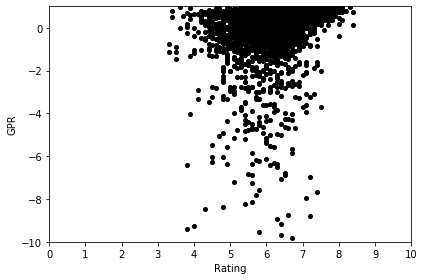

In [99]:
# Creating a boxplot of GPM vs. rating.
fig, ax1 = plt.subplots()
ax1.plot(data['vote_average'], data['GPM'], 'o', color='black', markersize=4)
ax1.set_xlabel('Rating')
ax1.set_ylabel('GPR')
ax1.set_xlim(0, 10)
ax1.set_ylim(-10, 1)
ax1.xaxis.set_major_locator(mpl.ticker.LinearLocator(11))
plt.tight_layout()

In [100]:
data[['vote_average', 'GPM']].corr()

,vote_average,GPM
vote_average,1.000000,0.149471
GPM,0.149471,1.000000


Yes, high ratings are associated with high GPM, although the correlation is not very strong.

### Is high budget associated with high GPM?

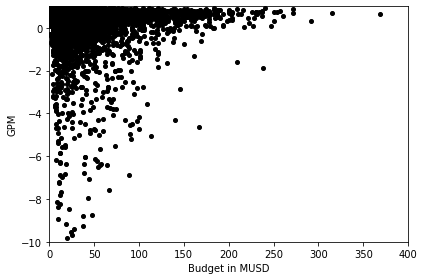

In [101]:
# Creating a boxplot of GPM vs. budget.
fig, ax1 = plt.subplots()
ax1.plot(data['budget_adj'], data['GPM'], 'o', color='black', markersize=4)
ax1.set_xlabel('Budget in MUSD')
ax1.set_ylabel('GPM')
ax1.set_xlim(0, 400)
ax1.set_ylim(-10, 1)
plt.tight_layout()

In [102]:
data[['budget_adj', 'GPM']].corr()

,budget_adj,GPM
budget_adj,1.000000,0.028202
GPM,0.028202,1.000000


No, high budget is not associated with high GPM.

### Is the GPM affected by the time of the year in which the movie is released?

In [103]:
'''
Defining a function which determines if a date is within two days of the year.
Takes as input a start_date and a later end_date, both normalized to the year 2000/2001, and the date in question.
Returns True or False
'''
def within_days_of_year(start_date, end_date, date):
    date.replace(year = 2000)
    if date<start_date:
        if date==pd.to_datetime('2000-02-29'):
            date.replace(year=2001, month=2, day=28)
        else:
            date.replace(year=2001)
    return (date>=start_date) & (date<=end_date)

In [104]:
'''
Definining a function which determines the correlation coefficient between the GPM and the release date being in a specific 
time of the year.
Taktes as input a start_date and a later end_date, both with year 2000, 
a dataframe with all release_dates and a dataframe with all GPM values.
Returns the correlation coefficient for the time of the year as defined start_date and end_date,
and also returns how many movies are within this time of the year.
'''
def correlation_days_of_year(start_date, end_date, release_dates, GPM):
    is_within = release_dates.apply(lambda date : within_days_of_year(start_date, end_date, date))
    return [np.corrcoef(is_within, GPM)[0,1], is_within.sum()]

In [105]:
'''
Creating the dataframe 'time_of_year_correlations'. This dataframe is the input and will also hold the output of the
function 'correlation_days_of_year' defined above.
It has the columns 'duration', start_date' and 'end date'.
The entries are all combinations of all 366 possibilities for start_day with all durations from 1 to 183.
The resulting table has 66,978 rows.
'''
start_month = 1
start_day = 1
end_month = 12
end_day = 31
min_duration=1
max_duration=183

start_dates = list(pd.date_range(start=pd.Timestamp(year=2000, month=start_month, day=start_day), end=pd.Timestamp(year=2000, month=end_month, day=end_day), freq='D'))
durations = list(range(min_duration, max_duration+1))

time_of_year_correlations = pd.DataFrame(list(itertools.product(*[durations, start_dates])), columns=['duration', 'start_date'])
time_of_year_correlations['end_date'] = time_of_year_correlations['start_date'] + pd.to_timedelta(time_of_year_correlations['duration']-1,unit='d')


In [106]:
'''
Creating paramaters apriori to pass to the apply-lambda function below, to avoid repetive evalution within.
'''
release_dates = data['release_date'].apply(lambda x: x.replace(year = 2000))
GPM = data['GPM']
row_max = len(time_of_year_correlations)

The next cell takes comparitively long to complete. It has been run overnight. Therefore the cells that follow in this section have been commented. The obtained output is given as text where possible.

In [107]:
'''
Calling the function 'correlation_days_of_year' on every row of 'time_of_year_correlations'.
The results are saved to a temporary dataframe 'df1' for easier coding and readability.

'''
# df1=(time_of_year_correlations.apply(lambda row : (correlation_days_of_year(row['start_date'], row['end_date'], release_dates, GPM), print(str(row.name+1)+' of '+str(row_max)+', '+str(round((row.name+1)/row_max*100,2))+' %', end='\r')), axis=1, result_type='expand'))

"\nCalling the function 'correlation_days_of_year' on every row of correlation_days_of_year.\nThe results are saved to a temporary dataframe 'df1' for easier coding and readability.\n\n"

In [108]:
'''
The results stored in the temporary dataframe 'df1' are added as results to the dataframe 'time_of_year_correlations'.
The table now has the input columns 'start_date' and 'end_date', the informative column 'duration', and the output columns
'correlation' (which is really the correlation coefficient) and 'movies_in_interval'.
'''
# series_of_lists = df1.iloc[:,0]
# list_of_lists = series_of_lists.tolist()
# df2=pd.DataFrame(list_of_lists, columns=['correlation', 'movies_in_interval'])
# time_of_year_correlations=time_of_year_correlations.join(df2)

"\nThe results stored in the temporary dataframe 'df1' are added as results to the dataframe 'time_of_year_correlations'.\nThe table now has the input columns 'start_date' and 'end_date', the informative column 'duration', and the output columns\n'correlation' (which is really the correlation coefficient) and 'movies_in_interval'.\n"

In [109]:
'''
Looking at the interval with the highest negative correlation coefficient between GPM and movies being in that interval.
'''
# time_of_year_correlations.iloc[time_of_year_correlations['correlation'].idxmin()]

'\nLooking at the interval with the highest negative correlation coefficient between GPM and movies being in that interval.\n'

This is just one day of the year and there are only 9 movies released on that day. This result does not mean much.

In [110]:
'''
Filtering for intervals of at least one week.
'''
# time_of_year_correlations.iloc[time_of_year_correlations[time_of_year_correlations['duration'] >= 7]['correlation'].idxmin()]

'\nFiltering for intervals of at least one week.\n'

There is a very weak but non-negligeable negative correlation between being released in the above interval and the economical performance.

In [111]:
'''
Filtering for intervals of at least one month.
'''
# time_of_year_correlations.iloc[time_of_year_correlations[time_of_year_correlations['duration'] >= 30]['correlation'].idxmin()]

'\nFiltering for intervals of at least one month.\n'

There is a very weak but non-negligeable negative correlation between being released in the above interval and the economical performance.

In [112]:
'''
Filtering for intervals of at least three months.
'''
# time_of_year_correlations.iloc[time_of_year_correlations[time_of_year_correlations['duration'] >= 90]['correlation'].idxmin()]

'\nFiltering for intervals of at least three months.\n'

There is a very weak but non-negligeable negative correlation between being released in the above interval and the economical performance.

In [113]:
'''
Looking at the interval with the highest positive correlation coefficient between GPM and movies being in that interval.
'''
# time_of_year_correlations.iloc[time_of_year_correlations['correlation'].idxmax()]

'\nLooking at the interval with the highest positive correlation coefficient between GPM and movies being in that interval.\n'

There is a very weak but non-negligeable positive correlation between being released in the above interval and the economical performance.

## Conclusions
<a id='conclusions'></a>

There is a positive correlation bewteen the movie rating and the economic performance operationally defined as GPM. However there is no correlation between the budget and the GPM. 

There is also a very small correlatation between the movie's release date in terms of time of the year and the GPM. Movies released between the 19th of may and the 4th of august tend to have higher GPMs, whereas movies released between the 29th of august and the 9th of november tend to have lower GPMs.